In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# EDA + Feature Engineering

In [2]:
token_metadata = pd.read_csv('/Users/shaheen/Documents/job_search_jan_2024/home_tasks/nft-valuations/data/token_metadata.csv')
token_metadata.head(10)

,Skin Tone,Type,Hair,Eyewear,Mouth,Headwear,Facial Hair,Smoking Device,Other:Earring,Neckwear,Skin Feature,Other:Medical Mask,Other:Clown Nose,Trait Count,rarest_property_name,token_index,rarity_score
0,Medium,Female,Blonde Bob,Green Eye Shadow,NaN,NaN,NaN,NaN,Earring,NaN,NaN,NaN,NaN,5 Trait Count,Hair:Blonde Bob,0,117.119410
1,Darker,Male,Mohawk,NaN,Smile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 Trait Count,Mouth:Smile,1,72.698512
2,Lighter,Female,Wild Hair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 Trait Count,Hair:Wild Hair,2,58.332241
3,Darker,Male,Wild Hair,Nerd Glasses,NaN,NaN,NaN,Pipe,NaN,NaN,NaN,NaN,NaN,5 Trait Count,Smoking Device:Pipe,3,78.818332
4,Medium,Male,Wild Hair,Big Shades,NaN,NaN,Goat,NaN,Earring,NaN,NaN,NaN,NaN,6 Trait Count,Facial Hair:Goat,4,91.025350
5,Medium,Female,Half Shaved,Purple Eye Shadow,NaN,NaN,NaN,NaN,Earring,NaN,NaN,NaN,NaN,5 Trait Count,Hair:Half Shaved,5,118.386980
6,Medium,Male,NaN,NaN,NaN,Do-rag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 Trait Count,Headwear:Do-rag,6,68.318508
7,Medium,Female,Wild White Hair,Clown Eyes Blue,NaN,NaN,NaN,NaN,NaN,NaN,Spots,NaN,NaN,5 Trait Count,Skin Feature:Spots,7,188.341376
8,Darker,Male,Messy Hair,NaN,NaN,NaN,Luxurious Beard,NaN,NaN,NaN,NaN,NaN,NaN,4 Trait Count,Facial Hair:Luxurious Beard,8,64.710134
9,Medium,Male,NaN,NaN,NaN,Police Cap,Big Beard,NaN,NaN,NaN,NaN,NaN,Clown Nose,5 Trait Count,Facial Hair:Big Beard,9,172.100919


In [3]:
token_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Skin Tone             10000 non-null  object 
 1   Type                  10000 non-null  object 
 2   Hair                  6212 non-null   object 
 3   Eyewear               6072 non-null   object 
 4   Mouth                 2545 non-null   object 
 5   Headwear              3542 non-null   object 
 6   Facial Hair           3503 non-null   object 
 7   Smoking Device        1550 non-null   object 
 8   Other:Earring         2459 non-null   object 
 9   Neckwear              373 non-null    object 
 10  Skin Feature          896 non-null    object 
 11  Other:Medical Mask    175 non-null    object 
 12  Other:Clown Nose      212 non-null    object 
 13  Trait Count           10000 non-null  object 
 14  rarest_property_name  10000 non-null  object 
 15  token_index         

In [4]:
token_metadata.nunique()

Skin Tone                   7
Type                        5
Hair                       25
Eyewear                    16
Mouth                       6
Headwear                   16
Facial Hair                12
Smoking Device              3
Other:Earring               1
Neckwear                    3
Skin Feature                3
Other:Medical Mask          1
Other:Clown Nose            1
Trait Count                 8
rarest_property_name       94
token_index             10000
rarity_score             9369
dtype: int64

In [5]:
token_metadata = token_metadata.fillna('Unknown')
token_metadata.nunique()

Skin Tone                   7
Type                        5
Hair                       26
Eyewear                    17
Mouth                       7
Headwear                   17
Facial Hair                13
Smoking Device              4
Other:Earring               2
Neckwear                    4
Skin Feature                4
Other:Medical Mask          2
Other:Clown Nose            2
Trait Count                 8
rarest_property_name       94
token_index             10000
rarity_score             9369
dtype: int64

In [6]:
token_metadata['rarest_property_name'] = token_metadata['rarest_property_name'].apply(lambda x: str(x).split(':')[0])
token_metadata.head()

,Skin Tone,Type,Hair,Eyewear,Mouth,Headwear,Facial Hair,Smoking Device,Other:Earring,Neckwear,Skin Feature,Other:Medical Mask,Other:Clown Nose,Trait Count,rarest_property_name,token_index,rarity_score
0,Medium,Female,Blonde Bob,Green Eye Shadow,Unknown,Unknown,Unknown,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,5 Trait Count,Hair,0,117.119410
1,Darker,Male,Mohawk,Unknown,Smile,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,4 Trait Count,Mouth,1,72.698512
2,Lighter,Female,Wild Hair,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3 Trait Count,Hair,2,58.332241
3,Darker,Male,Wild Hair,Nerd Glasses,Unknown,Unknown,Unknown,Pipe,Unknown,Unknown,Unknown,Unknown,Unknown,5 Trait Count,Smoking Device,3,78.818332
4,Medium,Male,Wild Hair,Big Shades,Unknown,Unknown,Goat,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,6 Trait Count,Facial Hair,4,91.025350


In [7]:
token_metadata.nunique()

Skin Tone                   7
Type                        5
Hair                       26
Eyewear                    17
Mouth                       7
Headwear                   17
Facial Hair                13
Smoking Device              4
Other:Earring               2
Neckwear                    4
Skin Feature                4
Other:Medical Mask          2
Other:Clown Nose            2
Trait Count                 8
rarest_property_name       10
token_index             10000
rarity_score             9369
dtype: int64

In [8]:
token_sales = pd.read_csv('/Users/shaheen/Documents/job_search_jan_2024/home_tasks/nft-valuations/data/token_sales.csv')
token_sales.head()

,token_index,timestamp,eth,usd,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,544,1498251906,0.01,3.2697,NaN,NaN,NaN,NaN,NaN
1,3134,1498252232,0.01,3.2697,NaN,NaN,NaN,NaN,NaN
2,5056,1498254413,0.10,32.6840,NaN,NaN,NaN,NaN,NaN
3,5719,1498255065,0.04,13.0736,NaN,NaN,NaN,NaN,NaN
4,6548,1498255212,0.03,9.8052,NaN,NaN,NaN,NaN,NaN


In [9]:
token_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21329 entries, 0 to 21328
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   token_index  21329 non-null  int64  
 1   timestamp    21329 non-null  int64  
 2   eth          21329 non-null  float64
 3   usd          21329 non-null  float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
dtypes: float64(7), int64(2)
memory usage: 1.5 MB


In [10]:
token_sales.describe()

,token_index,timestamp,eth,usd,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
count,21329.000000,2.132900e+04,2.132900e+04,2.132900e+04,0.0,0.0,0.0,0.0,0.0
mean,5332.144592,1.618455e+09,4.941974e+01,1.246907e+05,NaN,NaN,NaN,NaN,NaN
std,2702.721541,4.363499e+07,9.911308e+01,2.677752e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.498252e+09,1.000000e-18,2.210000e-16,NaN,NaN,NaN,NaN,NaN
25%,3060.000000,1.612559e+09,9.800000e+00,1.449384e+04,NaN,NaN,NaN,NaN,NaN
50%,5340.000000,1.626147e+09,3.700000e+01,7.793500e+04,NaN,NaN,NaN,NaN,NaN
75%,7662.000000,1.642789e+09,7.000000e+01,1.553610e+05,NaN,NaN,NaN,NaN,NaN
max,9998.000000,1.683597e+09,8.000000e+03,2.302992e+07,NaN,NaN,NaN,NaN,NaN


In [11]:
token_sales.nunique()

token_index     6924
timestamp      20392
eth             3514
usd            19321
Unnamed: 4         0
Unnamed: 5         0
Unnamed: 6         0
Unnamed: 7         0
Unnamed: 8         0
dtype: int64

In [12]:
token_sales = token_sales[['token_index', 'timestamp', 'eth', 'usd']]
token_sales.head()

,token_index,timestamp,eth,usd
0,544,1498251906,0.01,3.2697
1,3134,1498252232,0.01,3.2697
2,5056,1498254413,0.10,32.6840
3,5719,1498255065,0.04,13.0736
4,6548,1498255212,0.03,9.8052


In [13]:
token_sales['timestamp'] = pd.to_datetime(token_sales['timestamp'],unit='s')
token_sales['date'] = token_sales['timestamp'].dt.date
token_sales.head()

,token_index,timestamp,eth,usd,date
0,544,2017-06-23 21:05:06,0.01,3.2697,2017-06-23
1,3134,2017-06-23 21:10:32,0.01,3.2697,2017-06-23
2,5056,2017-06-23 21:46:53,0.10,32.6840,2017-06-23
3,5719,2017-06-23 21:57:45,0.04,13.0736,2017-06-23
4,6548,2017-06-23 22:00:12,0.03,9.8052,2017-06-23


In [14]:
print('date range {} - {}'.format(token_sales.date.min(), token_sales.date.max()))

date range 2017-06-23 - 2023-05-09


In [15]:
token_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21329 entries, 0 to 21328
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   token_index  21329 non-null  int64         
 1   timestamp    21329 non-null  datetime64[ns]
 2   eth          21329 non-null  float64       
 3   usd          21329 non-null  float64       
 4   date         21329 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 833.3+ KB


In [16]:
eth_usd_fx = pd.read_csv('/Users/shaheen/Documents/job_search_jan_2024/home_tasks/nft-valuations/data/eth_usd_fx_rates.csv')
eth_usd_fx.head()

,date,open
0,31/12/2016,8.162
1,01/01/2017,8.018
2,02/01/2017,8.154
3,03/01/2017,8.335
4,04/01/2017,9.639


In [17]:
eth_usd_fx['date'] = pd.to_datetime(eth_usd_fx['date']).dt.strftime('%Y-%m-%d')
eth_usd_fx.head()

,date,open
0,2016-12-31,8.162
1,2017-01-01,8.018
2,2017-01-02,8.154
3,2017-01-03,8.335
4,2017-01-04,9.639


In [18]:
eth_usd_fx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2263 non-null   object 
 1   open    2263 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.5+ KB


In [19]:
print('date range {} - {}'.format(eth_usd_fx.date.min(), eth_usd_fx.date.max()))

date range 2016-12-31 - 2023-05-09


In [20]:
master_data = pd.merge(token_sales, token_metadata, how='left', on='token_index')
print(master_data.shape)
master_data.head()

(21329, 21)


,token_index,timestamp,eth,usd,date,Skin Tone,Type,Hair,Eyewear,Mouth,...,Facial Hair,Smoking Device,Other:Earring,Neckwear,Skin Feature,Other:Medical Mask,Other:Clown Nose,Trait Count,rarest_property_name,rarity_score
0,544,2017-06-23 21:05:06,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3 Trait Count,Hair,59.139764
1,3134,2017-06-23 21:10:32,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Regular Shades,Unknown,...,Unknown,Unknown,Unknown,Gold Chain,Unknown,Unknown,Unknown,5 Trait Count,Neckwear,109.478392
2,5056,2017-06-23 21:46:53,0.10,32.6840,2017-06-23,Albino,Male,Unknown,VR,Unknown,...,Luxurious Beard,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,6 Trait Count,Headwear,314.946277
3,5719,2017-06-23 21:57:45,0.04,13.0736,2017-06-23,Medium,Female,Dark Hair,Welding Goggles,Unknown,...,Unknown,Cigarette,Unknown,Unknown,Unknown,Unknown,Unknown,5 Trait Count,Eyewear,198.504301
4,6548,2017-06-23 22:00:12,0.03,9.8052,2017-06-23,Albino,Male,Unknown,Clown Eyes Green,Unknown,...,Front Beard,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,6 Trait Count,Facial Hair,118.729414


In [21]:
master_data['date'] = pd.to_datetime(master_data['date'])
eth_usd_fx['date'] = pd.to_datetime(eth_usd_fx['date'])

master_data = pd.merge(master_data, eth_usd_fx, how='left', on='date')
print(master_data.shape)
master_data.head()

(21329, 22)


,token_index,timestamp,eth,usd,date,Skin Tone,Type,Hair,Eyewear,Mouth,...,Smoking Device,Other:Earring,Neckwear,Skin Feature,Other:Medical Mask,Other:Clown Nose,Trait Count,rarest_property_name,rarity_score,open
0,544,2017-06-23 21:05:06,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3 Trait Count,Hair,59.139764,320.97
1,3134,2017-06-23 21:10:32,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Regular Shades,Unknown,...,Unknown,Unknown,Gold Chain,Unknown,Unknown,Unknown,5 Trait Count,Neckwear,109.478392,320.97
2,5056,2017-06-23 21:46:53,0.10,32.6840,2017-06-23,Albino,Male,Unknown,VR,Unknown,...,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,6 Trait Count,Headwear,314.946277,320.97
3,5719,2017-06-23 21:57:45,0.04,13.0736,2017-06-23,Medium,Female,Dark Hair,Welding Goggles,Unknown,...,Cigarette,Unknown,Unknown,Unknown,Unknown,Unknown,5 Trait Count,Eyewear,198.504301,320.97
4,6548,2017-06-23 22:00:12,0.03,9.8052,2017-06-23,Albino,Male,Unknown,Clown Eyes Green,Unknown,...,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,6 Trait Count,Facial Hair,118.729414,320.97


In [22]:
master_data.isna().sum()

token_index               0
timestamp                 0
eth                       0
usd                       0
date                      0
Skin Tone                 0
Type                      0
Hair                      0
Eyewear                   0
Mouth                     0
Headwear                  0
Facial Hair               0
Smoking Device            0
Other:Earring             0
Neckwear                  0
Skin Feature              0
Other:Medical Mask        0
Other:Clown Nose          0
Trait Count               0
rarest_property_name      0
rarity_score              0
open                    393
dtype: int64

##### Missing values in eth_to_usd column

In [23]:
master_data[master_data.open.isna()].head()

,token_index,timestamp,eth,usd,date,Skin Tone,Type,Hair,Eyewear,Mouth,...,Smoking Device,Other:Earring,Neckwear,Skin Feature,Other:Medical Mask,Other:Clown Nose,Trait Count,rarest_property_name,rarity_score,open
448,6342,2017-07-10 02:46:45,0.08,18.9776,2017-07-10,Medium,Male,Unknown,Small Shades,Unknown,...,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,5 Trait Count,Headwear,108.121128,NaN
449,2054,2017-07-10 02:59:14,0.35,83.0270,2017-07-10,Darker,Female,Straight Hair Blonde,Clown Eyes Green,Unknown,...,Pipe,Unknown,Unknown,Unknown,Unknown,Clown Nose,6 Trait Count,Hair,187.525504,NaN
450,5277,2017-07-10 04:09:00,0.40,94.7880,2017-07-10,Medium,Female,Clown Hair Green,Eye Mask,Hot Lipstick,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,5 Trait Count,Hair,124.190213,NaN
451,549,2017-07-10 04:25:08,190.00,45024.3000,2017-07-10,Albino,Male,Unknown,3D Glasses,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3 Trait Count,Eyewear,76.474151,NaN
452,33,2017-07-10 04:25:39,88.80,21042.9360,2017-07-10,Lighter,Male,Peak Spike,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3 Trait Count,Hair,68.015914,NaN


In [24]:
eth_usd_fx[eth_usd_fx.date == '2017-07-10']

,date,open


##### Values are missing in exchange rate, we will fill it by zero

In [25]:
master_data['open'] = master_data['open'].fillna(master_data['open'].mean())
master_data.isna().sum()

token_index             0
timestamp               0
eth                     0
usd                     0
date                    0
Skin Tone               0
Type                    0
Hair                    0
Eyewear                 0
Mouth                   0
Headwear                0
Facial Hair             0
Smoking Device          0
Other:Earring           0
Neckwear                0
Skin Feature            0
Other:Medical Mask      0
Other:Clown Nose        0
Trait Count             0
rarest_property_name    0
rarity_score            0
open                    0
dtype: int64

In [26]:
master_data.groupby('token_index').size().reset_index(name='count').sort_values(by='count', ascending=False)

,token_index,count
6136,8922,34
5314,7834,34
3190,4930,32
3951,5967,31
4030,6064,31
...,...,...
4799,7112,1
4801,7115,1
4805,7119,1
4807,7121,1


In [27]:
def get_toke_sales_plot(df, token_index):
    tmp = master_data[master_data.token_index == token_index]
    fig, axes = plt.subplots(1,2, figsize=(8,4))
    axes= axes.flatten()
    axes[0].plot(tmp.date, tmp.eth, 'r-')
    axes[0].set_xticklabels(tmp.date, rotation=90)
    axes[1].plot(tmp.date, tmp.open, 'b-')
    axes[1].set_xticklabels(tmp.date, rotation=90)
    plt.show()

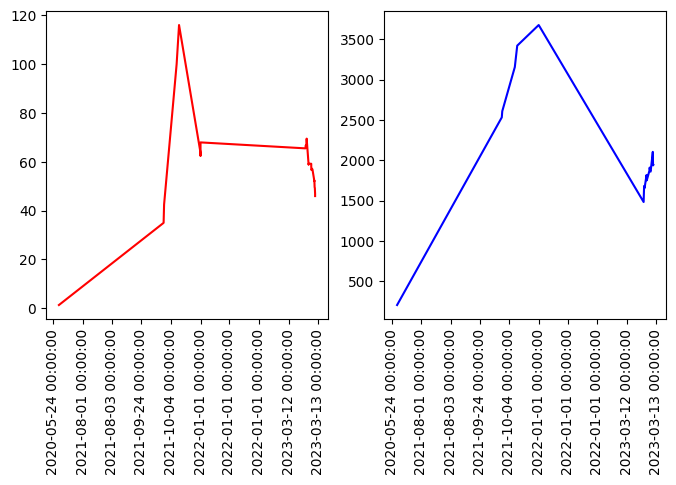

In [28]:
get_toke_sales_plot(master_data, 8922)

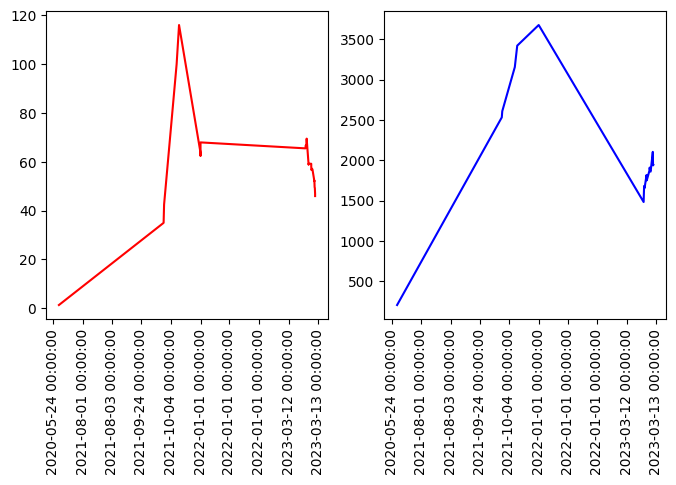

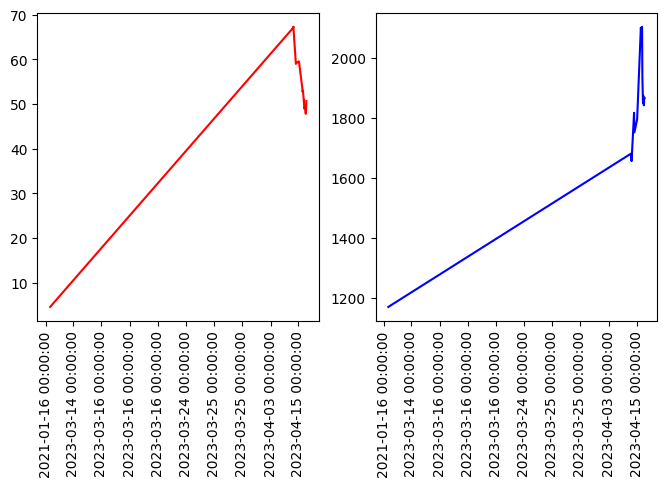

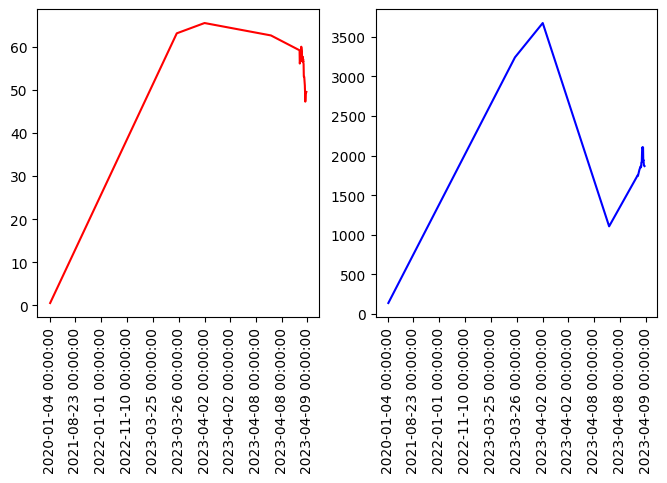

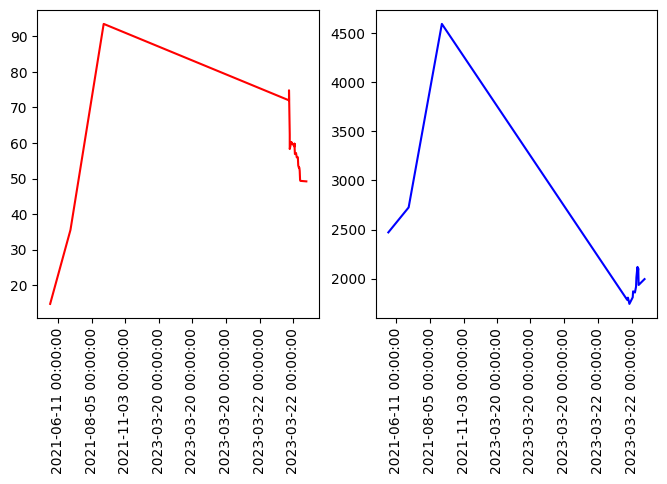

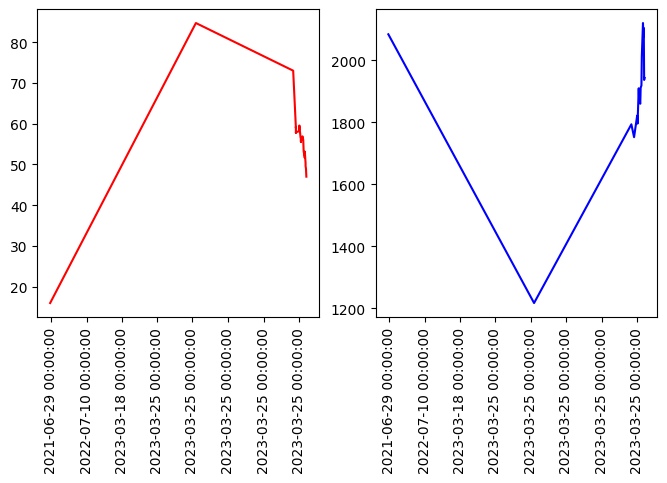

In [29]:
top_sellers_by_count = master_data.groupby('token_index').size().reset_index(name='count').sort_values(by='count', ascending=False).token_index[:5]

for tk in top_sellers_by_count:
    get_toke_sales_plot(master_data, tk)

In [30]:
master_data['Trait Count'] = master_data['Trait Count'].apply(lambda x: str(x).split(' ')[0])
master_data.head()

,token_index,timestamp,eth,usd,date,Skin Tone,Type,Hair,Eyewear,Mouth,...,Smoking Device,Other:Earring,Neckwear,Skin Feature,Other:Medical Mask,Other:Clown Nose,Trait Count,rarest_property_name,rarity_score,open
0,544,2017-06-23 21:05:06,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,3,Hair,59.139764,320.97
1,3134,2017-06-23 21:10:32,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Regular Shades,Unknown,...,Unknown,Unknown,Gold Chain,Unknown,Unknown,Unknown,5,Neckwear,109.478392,320.97
2,5056,2017-06-23 21:46:53,0.10,32.6840,2017-06-23,Albino,Male,Unknown,VR,Unknown,...,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,6,Headwear,314.946277,320.97
3,5719,2017-06-23 21:57:45,0.04,13.0736,2017-06-23,Medium,Female,Dark Hair,Welding Goggles,Unknown,...,Cigarette,Unknown,Unknown,Unknown,Unknown,Unknown,5,Eyewear,198.504301,320.97
4,6548,2017-06-23 22:00:12,0.03,9.8052,2017-06-23,Albino,Male,Unknown,Clown Eyes Green,Unknown,...,Unknown,Earring,Unknown,Unknown,Unknown,Unknown,6,Facial Hair,118.729414,320.97


<Axes: >

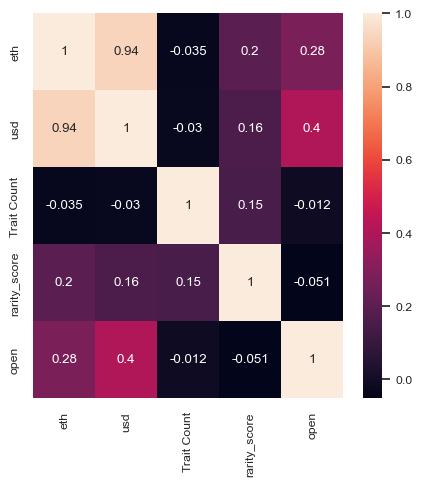

In [31]:
#correlation between avg_eth_sales _value and rarity_score, eth_to_usd_rate, trait_count
corr_mat = master_data[['eth', 'usd', 'Trait Count', 'rarity_score', 'open']].corr()

sns.set(rc={'figure.figsize':(5,5)}, font_scale=0.8)
sns.heatmap(corr_mat, annot=True)

In [32]:
def get_plot(tmp, column_name, aggregation_type, ax=None):
    if ax is None:
        plt.figure(figsize=(4, 3))
        ax = plt.gca()

    ax.bar(tmp[column_name], tmp['eth'], color='blue', alpha=0.7, label='ETH')

    # Add labels and title
    ax.set_xlabel(f'{column_name}')
    ax.set_ylabel(f'{aggregation_type} Amount')
    ax.set_title(f'{aggregation_type} Amount of USD by {column_name}')
    ax.tick_params(axis='x', rotation=45, labelrotation=45)
    ax.legend()

    ax.set_xticks(range(len(tmp[column_name])))
    ax.set_xticklabels(tmp[column_name], rotation=45, ha='right')

    # Display the plot
    if ax is None:
        plt.tight_layout()
        plt.show()

def get_count_plot(tmp, column_name, aggregation_type, ax=None):
    if ax is None:
        plt.figure(figsize=(4, 3))
        ax = plt.gca()
    ax.bar(tmp[column_name], tmp['count'], color='blue', alpha=0.7, label='ETH')

    # Add labels and title
    ax.set_xlabel(f'{column_name}')
    ax.set_ylabel(f'{aggregation_type}')
    ax.set_title(f'{aggregation_type} by {column_name}')
    ax.tick_params(axis='x', rotation=45, labelrotation=45)
    ax.legend()

    ax.set_xticks(range(len(tmp[column_name])))
    ax.set_xticklabels(tmp[column_name], rotation=45, ha='right')

    # Display the plot
    if ax is None:
        plt.tight_layout()
        plt.show()

def get_eth_plot_by_column(df, column_name, aggregation_type, ax=None):
    if aggregation_type == 'sum':
        tmp = df.groupby(column_name).agg({'eth': 'sum', 'usd': 'sum'}).reset_index()
        get_plot(tmp, column_name, aggregation_type, ax)
    elif aggregation_type == 'mean':
        tmp = df.groupby(column_name).agg({'eth': 'mean', 'usd': 'mean'}).reset_index()
        get_plot(tmp, column_name, aggregation_type, ax)
    elif aggregation_type == 'count':
        tmp = df.groupby(column_name).size().reset_index(name='count')
        get_count_plot(tmp, column_name, aggregation_type, ax)

### Feature Engineering: Get date features

In [33]:
def get_date_feature(df, date_column):
    # Convert the date_column to datetime if it's not already
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Year
    df['year'] = df[date_column].dt.year
    
    # Month
    df['month'] = df[date_column].dt.month
    
    # Day of Month
    df['day_of_month'] = df[date_column].dt.day
    
    # Day of Week (0=Monday, 6=Sunday)
    df['day_of_week'] = df[date_column].dt.dayofweek
    
    # Week of Month
    df['week_of_month'] = df[date_column].dt.day // 7 + 1
    
    return df

master_data = get_date_feature(master_data, 'date')
master_data.head()

,token_index,timestamp,eth,usd,date,Skin Tone,Type,Hair,Eyewear,Mouth,...,Other:Clown Nose,Trait Count,rarest_property_name,rarity_score,open,year,month,day_of_month,day_of_week,week_of_month
0,544,2017-06-23 21:05:06,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Unknown,Unknown,...,Unknown,3,Hair,59.139764,320.97,2017,6,23,4,4
1,3134,2017-06-23 21:10:32,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Regular Shades,Unknown,...,Unknown,5,Neckwear,109.478392,320.97,2017,6,23,4,4
2,5056,2017-06-23 21:46:53,0.10,32.6840,2017-06-23,Albino,Male,Unknown,VR,Unknown,...,Unknown,6,Headwear,314.946277,320.97,2017,6,23,4,4
3,5719,2017-06-23 21:57:45,0.04,13.0736,2017-06-23,Medium,Female,Dark Hair,Welding Goggles,Unknown,...,Unknown,5,Eyewear,198.504301,320.97,2017,6,23,4,4
4,6548,2017-06-23 22:00:12,0.03,9.8052,2017-06-23,Albino,Male,Unknown,Clown Eyes Green,Unknown,...,Unknown,6,Facial Hair,118.729414,320.97,2017,6,23,4,4


In [34]:
def plot_columns_in_grid(df, columns_top_plot, num_rows, num_cols, aggregation_type):
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 14))
    axes = axes.flatten()

    # Loop through the columns and create plots
    for i, col in enumerate(columns_top_plot):
        ax = axes[i]  # Get the current axis
        get_eth_plot_by_column(df, col, aggregation_type, ax=ax)
        ax.set_title(f'ETH Plot by {col}')
        
    # Hide any remaining empty subplots
    for i in range(len(columns_top_plot), num_rows*num_cols):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

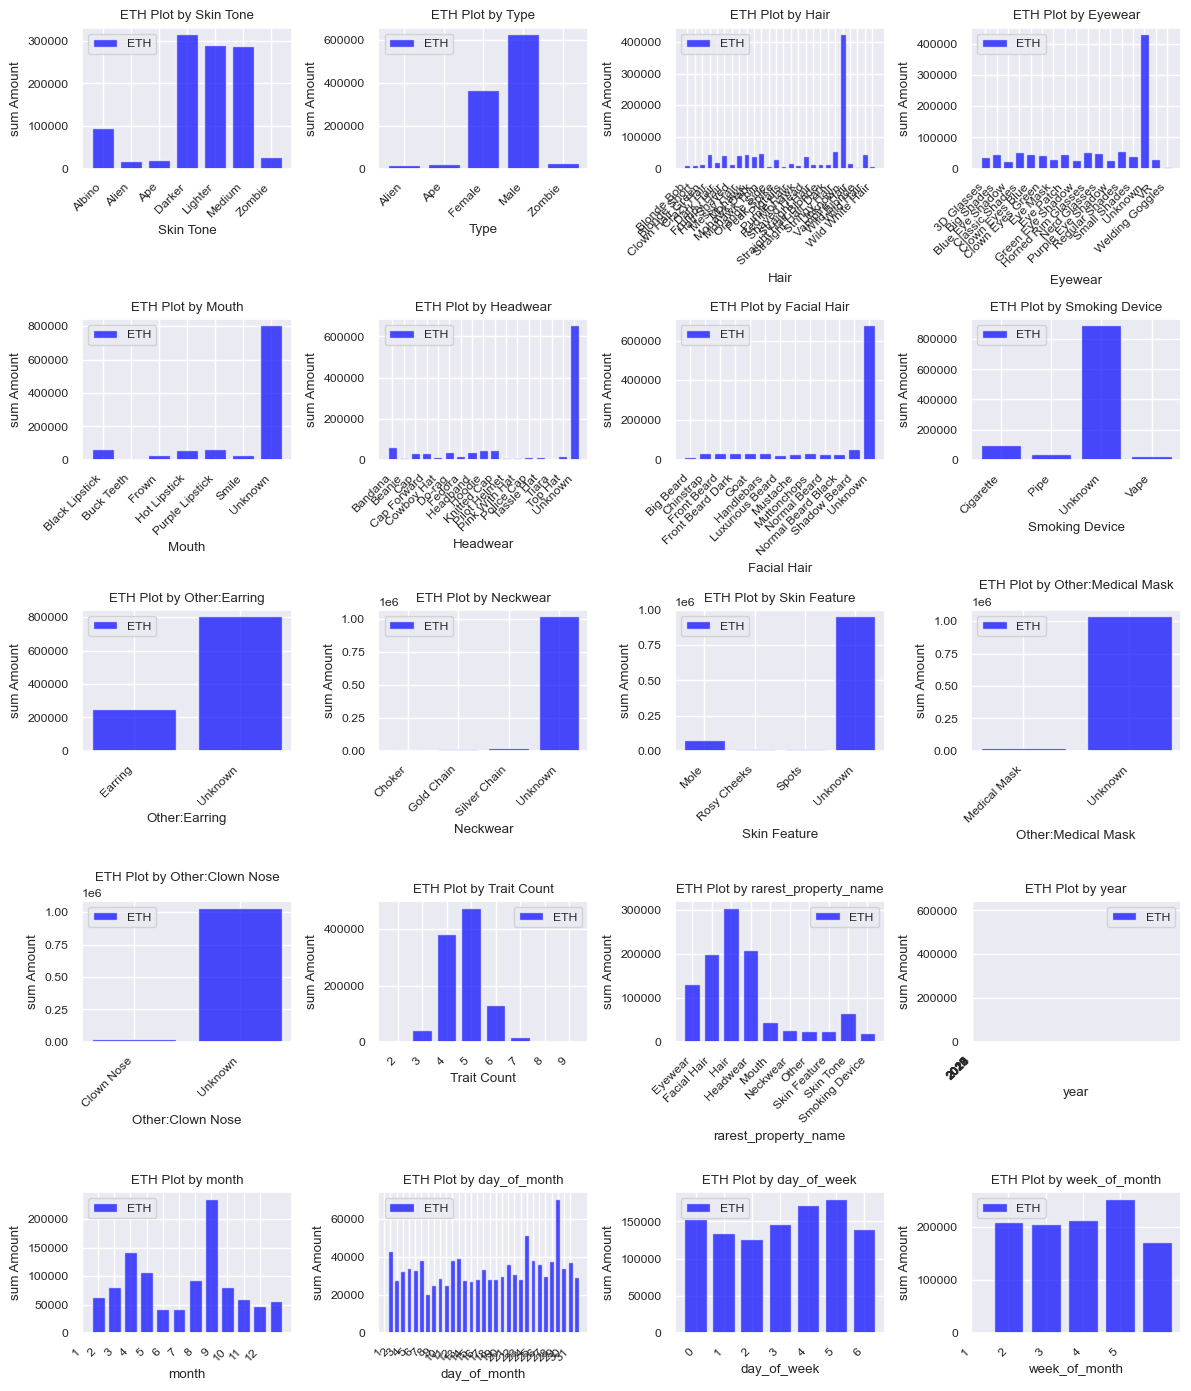

In [35]:
# master_data.groupby('Skin Tone').agg({'eth': 'sum', 'usd': 'sum'}).reset_index().plot.bar()
columns_top_plot = ['Skin Tone', 'Type',
       'Hair', 'Eyewear', 'Mouth', 'Headwear', 'Facial Hair', 'Smoking Device',
       'Other:Earring', 'Neckwear', 'Skin Feature', 'Other:Medical Mask',
       'Other:Clown Nose', 'Trait Count', 'rarest_property_name', 'year', 'month', 'day_of_month', 'day_of_week',
       'week_of_month']
aggregation_type = 'sum'
num_rows = 5
num_cols = 4
plot_columns_in_grid(master_data, columns_top_plot, num_rows, num_cols, aggregation_type)


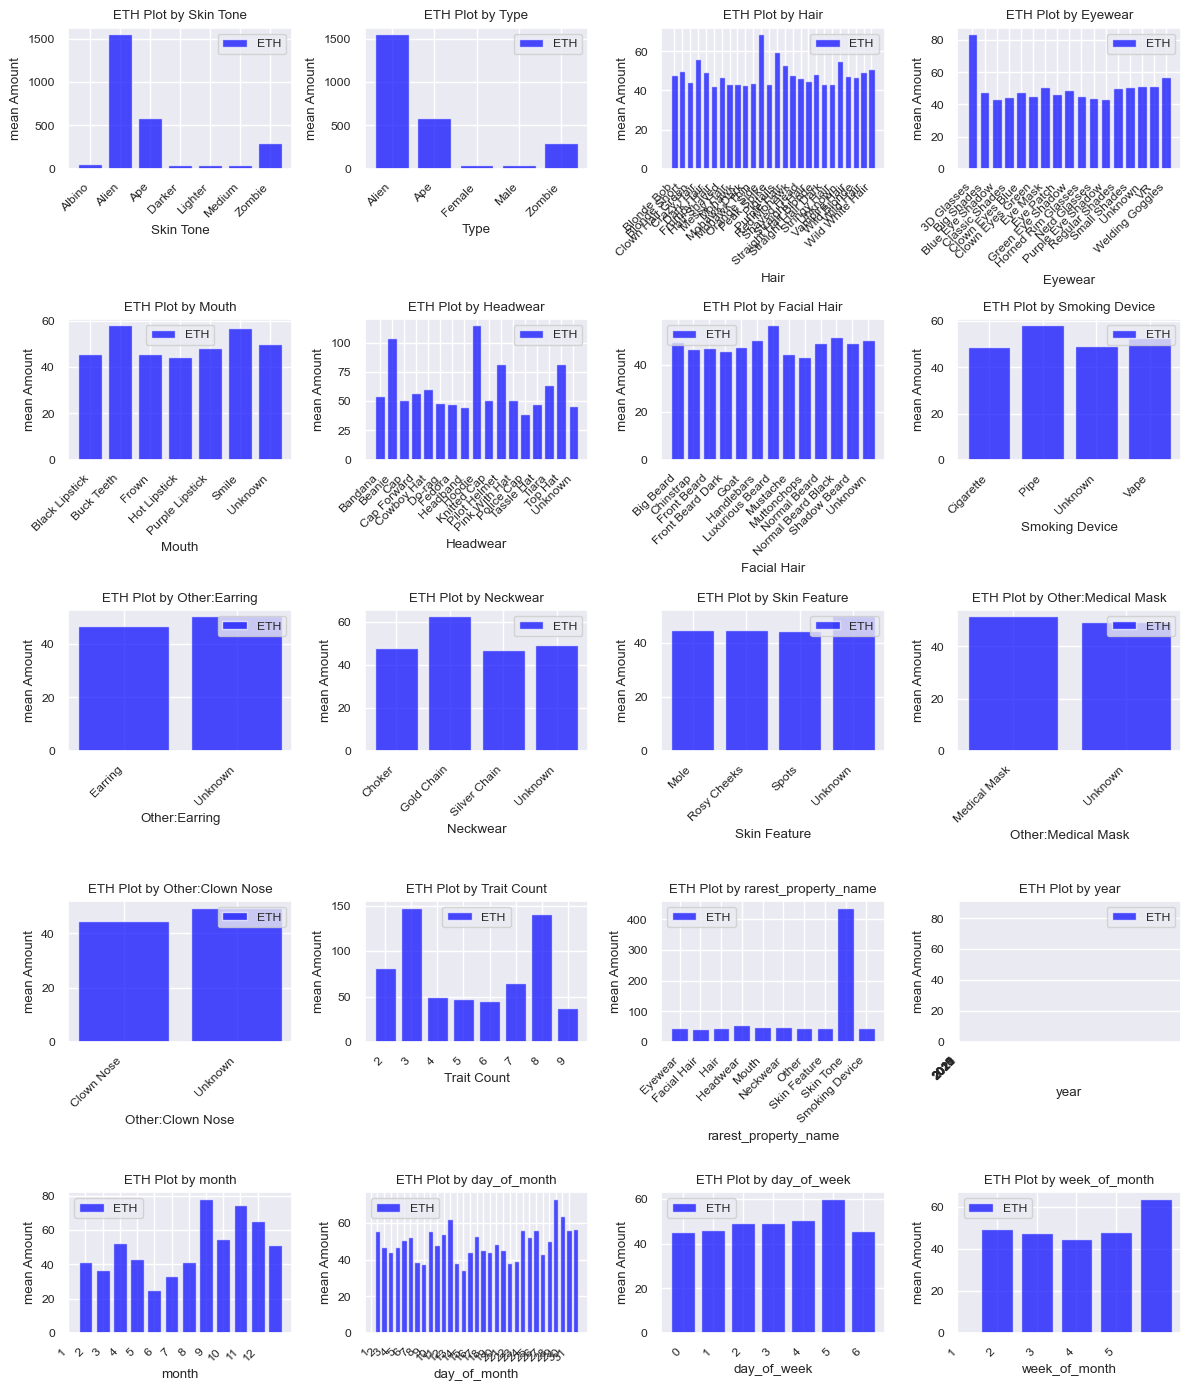

In [36]:
# master_data.groupby('Skin Tone').agg({'eth': 'sum', 'usd': 'sum'}).reset_index().plot.bar()
columns_top_plot = ['Skin Tone', 'Type',
       'Hair', 'Eyewear', 'Mouth', 'Headwear', 'Facial Hair', 'Smoking Device',
       'Other:Earring', 'Neckwear', 'Skin Feature', 'Other:Medical Mask',
       'Other:Clown Nose', 'Trait Count', 'rarest_property_name', 'year', 'month', 'day_of_month', 'day_of_week',
       'week_of_month']
aggregation_type = 'mean'
num_rows = 5
num_cols = 4
plot_columns_in_grid(master_data, columns_top_plot, num_rows, num_cols, aggregation_type)


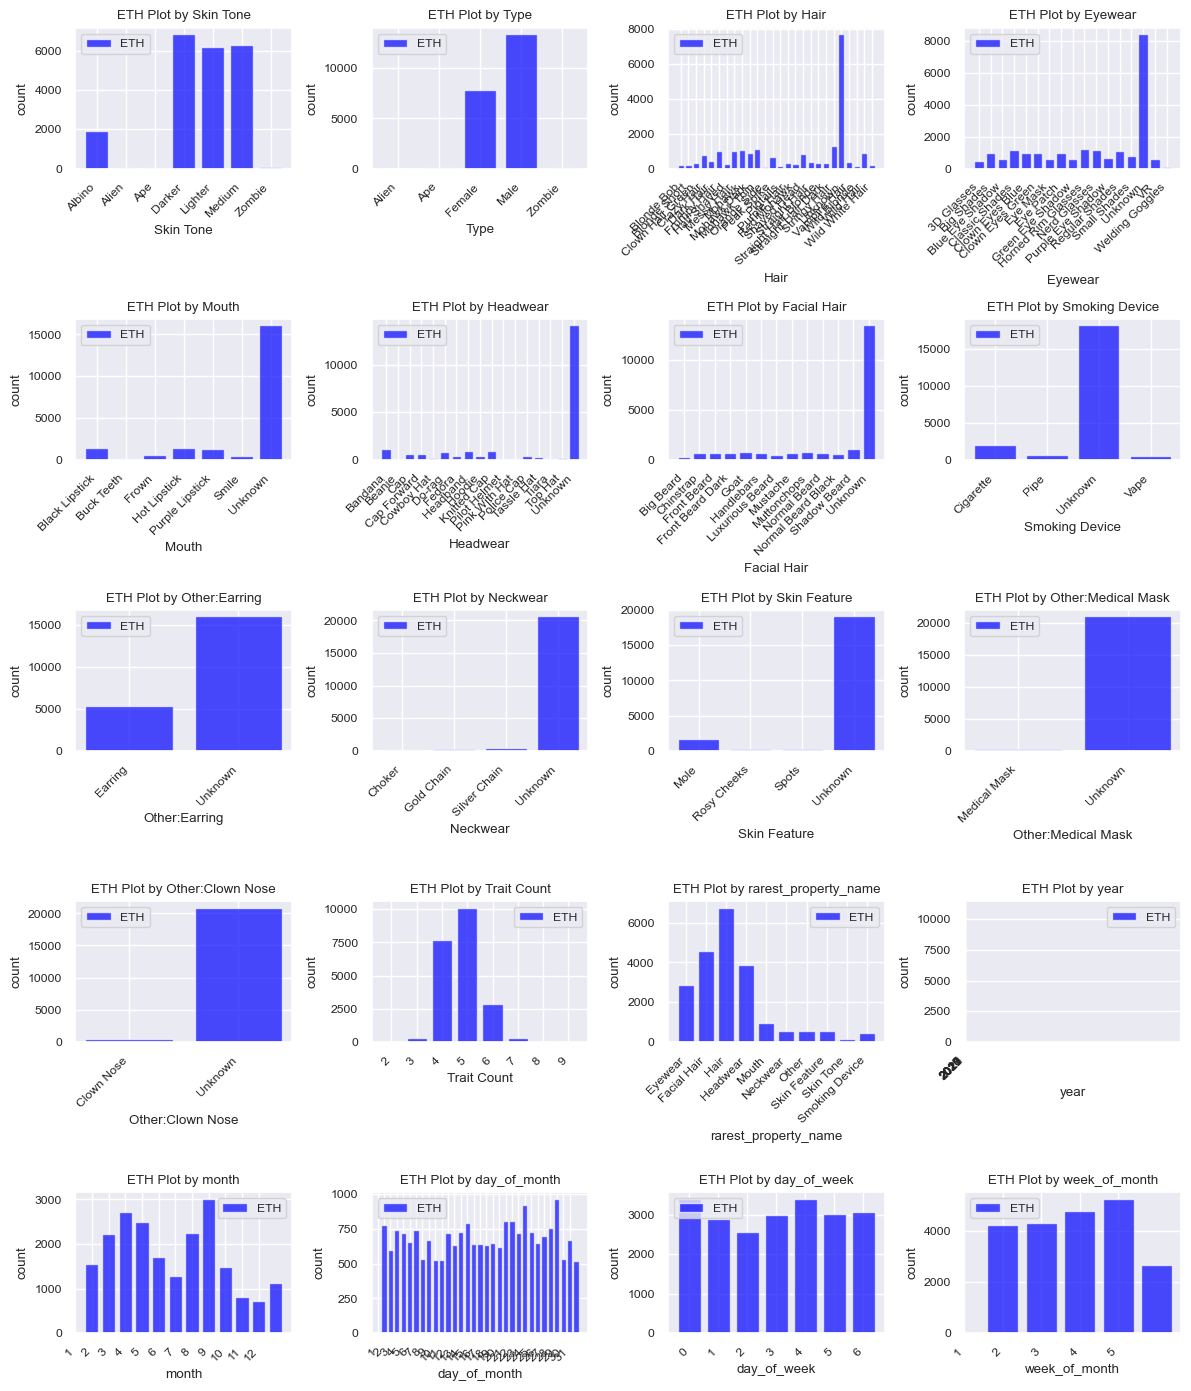

In [37]:
# master_data.groupby('Skin Tone').agg({'eth': 'sum', 'usd': 'sum'}).reset_index().plot.bar()
columns_top_plot = ['Skin Tone', 'Type',
       'Hair', 'Eyewear', 'Mouth', 'Headwear', 'Facial Hair', 'Smoking Device',
       'Other:Earring', 'Neckwear', 'Skin Feature', 'Other:Medical Mask',
       'Other:Clown Nose', 'Trait Count', 'rarest_property_name', 'year', 'month', 'day_of_month', 'day_of_week',
       'week_of_month']
aggregation_type = 'count'
num_rows = 5
num_cols = 4
plot_columns_in_grid(master_data, columns_top_plot, num_rows, num_cols, aggregation_type)


In [38]:
master_data.head()

,token_index,timestamp,eth,usd,date,Skin Tone,Type,Hair,Eyewear,Mouth,...,Other:Clown Nose,Trait Count,rarest_property_name,rarity_score,open,year,month,day_of_month,day_of_week,week_of_month
0,544,2017-06-23 21:05:06,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Unknown,Unknown,...,Unknown,3,Hair,59.139764,320.97,2017,6,23,4,4
1,3134,2017-06-23 21:10:32,0.01,3.2697,2017-06-23,Medium,Male,Crazy Hair,Regular Shades,Unknown,...,Unknown,5,Neckwear,109.478392,320.97,2017,6,23,4,4
2,5056,2017-06-23 21:46:53,0.10,32.6840,2017-06-23,Albino,Male,Unknown,VR,Unknown,...,Unknown,6,Headwear,314.946277,320.97,2017,6,23,4,4
3,5719,2017-06-23 21:57:45,0.04,13.0736,2017-06-23,Medium,Female,Dark Hair,Welding Goggles,Unknown,...,Unknown,5,Eyewear,198.504301,320.97,2017,6,23,4,4
4,6548,2017-06-23 22:00:12,0.03,9.8052,2017-06-23,Albino,Male,Unknown,Clown Eyes Green,Unknown,...,Unknown,6,Facial Hair,118.729414,320.97,2017,6,23,4,4


In [39]:
master_data = master_data.sort_values('date', ascending=True)
# master_data = master_data.reset_index()
master_data.head()

,token_index,timestamp,eth,usd,date,Skin Tone,Type,Hair,Eyewear,Mouth,...,Other:Clown Nose,Trait Count,rarest_property_name,rarity_score,open,year,month,day_of_month,day_of_week,week_of_month
0,544,2017-06-23 21:05:06,0.010,3.26970,2017-06-23,Medium,Male,Crazy Hair,Unknown,Unknown,...,Unknown,3,Hair,59.139764,320.97,2017,6,23,4,4
19,1841,2017-06-23 23:40:04,0.250,82.85000,2017-06-23,Darker,Female,Mohawk Thin,Green Eye Shadow,Black Lipstick,...,Unknown,5,Eyewear,84.150533,320.97,2017,6,23,4,4
18,5916,2017-06-23 23:35:25,0.300,99.42000,2017-06-23,Medium,Male,Mohawk Dark,VR,Unknown,...,Unknown,4,Eyewear,61.194638,320.97,2017,6,23,4,4
17,4641,2017-06-23 23:31:47,0.200,66.28000,2017-06-23,Lighter,Female,Wild Blonde,Purple Eye Shadow,Unknown,...,Unknown,5,Hair,126.170786,320.97,2017,6,23,4,4
16,6318,2017-06-23 23:26:08,0.107,34.97295,2017-06-23,Lighter,Male,Mohawk,Eye Mask,Unknown,...,Unknown,6,Eyewear,88.424911,320.97,2017,6,23,4,4


##### Checking what tokens were never sold
- Checking if they have specific metadata

In [40]:
never_sold= list(set(token_metadata.token_index.unique()).difference(set(token_sales.token_index.unique())))
print('{} of token_indices were never sold'.format(len(never_sold)))

3076 of token_indices were never sold


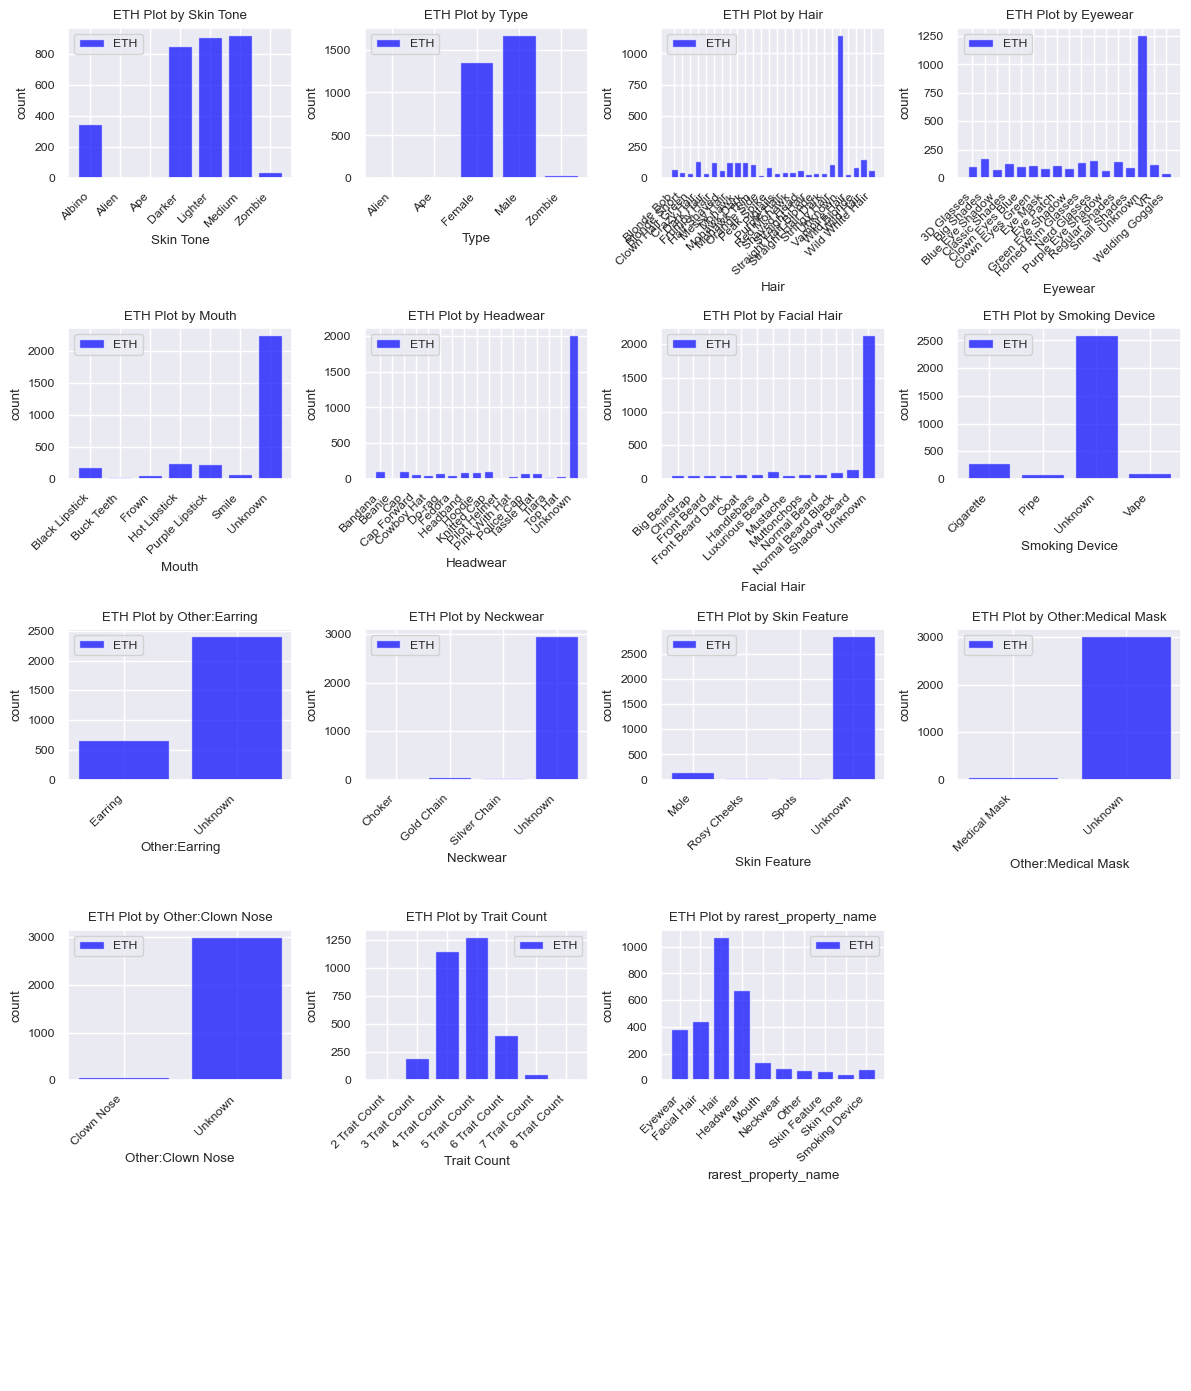

In [41]:
# master_data.groupby('Skin Tone').agg({'eth': 'sum', 'usd': 'sum'}).reset_index().plot.bar()
columns_top_plot = ['Skin Tone', 'Type',
       'Hair', 'Eyewear', 'Mouth', 'Headwear', 'Facial Hair', 'Smoking Device',
       'Other:Earring', 'Neckwear', 'Skin Feature', 'Other:Medical Mask',
       'Other:Clown Nose', 'Trait Count', 'rarest_property_name']
aggregation_type = 'count'
num_rows = 5
num_cols = 4
plot_columns_in_grid(token_metadata[token_metadata.token_index.isin(never_sold)], columns_top_plot, num_rows, num_cols, aggregation_type)


### Feature Engineering
- Creating feature to capture market state. 'sum_last_7_days_eth_sales' capture the total sales in eth in the last 4 days excluding the current day

In [42]:
master_data['sum_last_7_days_eth_sales'] = master_data[['date', 'eth']].rolling(pd.Timedelta(days=4), on='date').sum()['eth']
master_data['sum_last_7_days_eth_sales'] -= master_data['eth']
master_data.head()

,token_index,timestamp,eth,usd,date,Skin Tone,Type,Hair,Eyewear,Mouth,...,Trait Count,rarest_property_name,rarity_score,open,year,month,day_of_month,day_of_week,week_of_month,sum_last_7_days_eth_sales
0,544,2017-06-23 21:05:06,0.010,3.26970,2017-06-23,Medium,Male,Crazy Hair,Unknown,Unknown,...,3,Hair,59.139764,320.97,2017,6,23,4,4,0.00
19,1841,2017-06-23 23:40:04,0.250,82.85000,2017-06-23,Darker,Female,Mohawk Thin,Green Eye Shadow,Black Lipstick,...,5,Eyewear,84.150533,320.97,2017,6,23,4,4,0.01
18,5916,2017-06-23 23:35:25,0.300,99.42000,2017-06-23,Medium,Male,Mohawk Dark,VR,Unknown,...,4,Eyewear,61.194638,320.97,2017,6,23,4,4,0.26
17,4641,2017-06-23 23:31:47,0.200,66.28000,2017-06-23,Lighter,Female,Wild Blonde,Purple Eye Shadow,Unknown,...,5,Hair,126.170786,320.97,2017,6,23,4,4,0.56
16,6318,2017-06-23 23:26:08,0.107,34.97295,2017-06-23,Lighter,Male,Mohawk,Eye Mask,Unknown,...,6,Eyewear,88.424911,320.97,2017,6,23,4,4,0.76


In [43]:
master_data.to_csv('/Users/shaheen/Documents/job_search_jan_2024/home_tasks/nft-valuations/data/data_with_features.csv', index=False)

In [44]:
master_data.token_index.nunique()

6924